# Lab Error Analysis

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice

Listing chemicals for analysis

In [2]:
specified_chemicals = ["Chloromethane (methyl chloride)", "Chloroethene (vinyl chloride)", 
    "Bromomethane (methyl bromide)", "Chloroethane (ethyl chloride)",
    "Trichlorofluoromethane", "Diethyl ether", "1,1-Dichloroethene", "Acetone",
    "Iodomethane", "Carbon disulfide", "3-Chloropropene (allyl chloride)",
    "Methylene chloride (DCM)", "trans-1,2-Dichloroethene", "Methyl tert-butyl ether (MTBE)",
    "1,1-Dichloroethane", "2,2-Dichloropropane", "cis-1,2-Dichloroethene", "2-Butanone (MEK)",
    "Methyl acrylate", "Methacrylonitrile", "Bromochloromethane", "Tetrahydrofuran",
    "Trichloromethane (chloroform)", "1,1,1-Trichloroethane", "1-Chlorobutane (butyl chloride)", "Carbon tetrachloride",
    "1,1-Dichloropropene", "Benzene", "1,2-Dichloroethane",
    "Trichloroethene", "1,2-Dichloropropane", "Dibromomethane", "Methyl methacrylate",
    "Bromodichloromethane", "2-Nitropropane", "cis-1,3-Dichloropropene", "4-Methyl-2-pentanone (MIBK)", "Toluene", "trans-1,3-Dichloropropene", "Ethyl methacrylate",
    "1,1,2-Trichloroethane", "Tetrachloroethene", "1,3-Dichloropropane", "2-Hexanone",
    "Dibromochloromethane", "1,2-Dibromoethane (EDB)", "Chlorobenzene",
    "1,1,1,2-Tetrachloroethane", "Ethylbenzene", "m/p-Xylene", "o-Xylene", "Styrene",
    "Bromoform", "Isopropylbenzene (cumene)","Bromobenzene", "1,1,2,2-Tetrachloroethane", "1,2,3-Trichloropropane (TCP)",
    "trans-1,4-Dichloro-2-butene", "n-Propylbenzene", "2-Chlorotoluene", "1,3,5-Trimethylbenzene",
    "4-Chlorotoluene", "tert-Butylbenzene", "Pentachloroethane", "1,2,4-Trimethylbenzene",
    "1-Methylpropylbenzene (sec-butylbenzene)", "1,3-Dichlorobenzene", "4-Isopropyltoluene (p-cymene)", "1,4-Dichlorobenzene", "n-Butylbenzene", "1,2-Dichlorobenzene",
    "Hexachloroethane", "1,2-Dibromo-3-chloropropane (DBCP)", "Nitrobenzene", "1,2,4-Trichlorobenzene",
    "Hexachloro-1,3-butadiene", "Naphthalene", "1,2,3-Trichlorobenzene" 
] 

Defining the chemicals detected

In [48]:
detect_chemicals = ["Bromoform",
"Dibromochloromethane",
"Bromodichloromethane",
"Trichloromethane (chloroform)",
"Tetrahydrofuran",
"2-Butanone (MEK)",
"Carbon disulfide",
"Acetone",
"Chloromethane (methyl chloride)",
"Bromochloromethane"
"Methylene chloride (DCM)",
"Chloroethene (vinyl chloride)",
"Methyl tert-butyl ether (MTBE)",
"Styrene",
"Dibromomethane"
]

# Data Ingestion

In [49]:
#Excel files and only VOCs
raw_data_path = os.path.join(os.getcwd(),'Raw_data')
files = os.listdir(raw_data_path)
files_xls = [f for f in files if f.endswith('.xlsx') and 'SVOC' not in f] 

ccv_data = {} 
desired_sheets = ['CCV', 'CCV1', 'CCV2', 'CCV3', 'CCV4'] #We are only using these sheets for error analysis
for file in files_xls:
    file_path = os.path.join(raw_data_path, file)
    xls = pd.ExcelFile(file_path)
    for sheet_name in xls.sheet_names:
        if sheet_name in desired_sheets:
            df = pd.read_excel(file_path, sheet_name=sheet_name)
            ccv_data[f'{file} - {sheet_name}'] = df
dict(islice(ccv_data.items(), 0, 2))

{'231205_VOC.xlsx - CCV':                       Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
 0                            NaN         RT       Area    ICAL Rt  ICAL Area   
 1       Pentafluorobenzene [IS1]       5.43     228338       5.43     235261   
 2      1,4-Difluorobenzene [IS2]       6.17     354508       6.17     402712   
 3         Chlorobenzene-d5 [IS3]       8.91     347493       8.92     387093   
 4   1,4-Dichlorobenzene-d4 [IS4]      10.66     200989      10.67     214027   
 ..                           ...        ...        ...        ...        ...   
 82                           NaN        NaN        NaN        NaN        NaN   
 83                           NaN        NaN        NaN        NaN        NaN   
 84                           NaN        NaN        NaN        NaN        NaN   
 85                           NaN        NaN        NaN        NaN        NaN   
 86                           NaN        NaN        NaN        NaN        NaN   
 
 

# Filter data

In [50]:
filtered_ccv_data = {}
for key, df in ccv_data.items():
    df.columns = df.columns.str.strip()
    if 'Amount' in df.columns and 'Peak Name' in df.columns: #We only want chemical name and amount
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce') 
        df['Peak Name'] = df['Peak Name'].str.strip()
        filtered_ccv_data[key] = df[['Amount', 'Peak Name']]
    else:
        print(f"Warning: 'Amount' or 'Peak Name' columns not found in {key}")

In [51]:
for key,df in filtered_ccv_data.items():
  if 'Peak Name' in df.columns:
        filtered_ccv_data[key]['Peak Name'] = filtered_ccv_data[key]['Peak Name'].replace('Methylene chloride', 'Methylene chloride (DCM)')
        filtered_ccv_data[key] = df[df['Peak Name'].isin(detect_chemicals)] #can be specified chemicals
#IF YOU WOULD LIKE TO RUN FOR ALL CHEMS: SWITCH ABOVE TO SPECIFIED_CHEMICALS
#Clean names

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_726/1512551175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ccv_data[key]['Peak Name'] = filtered_ccv_data[key]['Peak Name'].replace('Methylene chloride', 'Methylene chloride (DCM)')


# Relevant lab information:
Initially it was 8/4 (ketones/others)
Starting from 2023-09-12 the CCV was 18/10 (ketones/others)
Starting from 2024 the CCV was 20/10 (ketones/others)

First group:  230907_VOC,  230908
Second group: 230912 to anything 24 
Last group is anything that starts with 24

Ketones end in "one", there are four:
 Acetone
 2-Butanone (MEK)
 4-Methyl-2-pentanone (MIBK)
 2-Hexanone

## Compare observed and expected values

In [52]:
#I made .csvs for relevant lab information
folder_path = os.path.join(os.getcwd(), 'Raw_data')
csv_files = os.listdir(folder_path)
def load_csv(csv_filename):
    return pd.read_csv(os.path.join(folder_path, csv_filename))

In [53]:
#Create comparison dictionaries
comparison_results = {}

for key, df_excel in filtered_ccv_data.items():
    file_name = key.split(' - ')[0] 
    
    # Group 1: Files that contain '230907_VOC' or '230907'
    if '230907_VOC' in file_name or '230908_VOC' in file_name:
        csv_filename = 'First_Group_CCV - Sheet1.csv'  
        csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
        
        comparison_results[key] = comparison
    
    # Group 2: Files that start with '230912' or files between '23' and '24'
    elif '230912' in file_name or '23' in file_name:
        csv_filename = 'Second_Group_CCV - Sheet1.csv' 
        csv_data = csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
       
        comparison_results[key] = comparison
    
    #Group 3: 2024
    elif file_name.startswith('24'):
        csv_filename = 'Third_Group_CCV - Sheet1.csv'  
        csv_data = csv_data = load_csv(csv_filename)
        comparison = pd.merge(df_excel, csv_data, how='left', on=['Peak Name'])
        comparison_results[key] = comparison
dict(islice(comparison_results.items(), 0, 2))

{'231205_VOC.xlsx - CCV':     Amount_x                        Peak Name  Amount_y
 0      5.567  Chloromethane (methyl chloride)        10
 1      5.658    Chloroethene (vinyl chloride)        10
 2     24.477                          Acetone        18
 3      5.696                 Carbon disulfide        10
 4      5.315   Methyl tert-butyl ether (MTBE)        10
 5     22.373                 2-Butanone (MEK)        18
 6      5.131                  Tetrahydrofuran        10
 7      6.107    Trichloromethane (chloroform)        10
 8      7.001                   Dibromomethane        10
 9      6.179             Bromodichloromethane        10
 10     6.385             Dibromochloromethane        10
 11     6.388                          Styrene        10
 12     6.597                        Bromoform        10,
 '230908_VOC.xlsx - CCV1':     Amount_x                        Peak Name  Amount_y
 0      4.382  Chloromethane (methyl chloride)         4
 1      3.929    Chloroethene (vinyl

## Perform Error Metrics

In [54]:
all_dfs=[]       
for key,df in comparison_results.items(): #amount_x is observed and amount y is expected
    df['Recovery'] = (df['Amount_x'] / df['Amount_y']) *100
    all_dfs.append(df[['Peak Name', 'Recovery']])
    combined_df = pd.concat(all_dfs)
avg_percent_diff_df = combined_df.groupby('Peak Name', as_index=False).agg(
    avg_percent_diff=('Recovery', 'mean'),
    std_percent_diff=('Recovery', 'std')  
)

avg_percent_diff_df.columns = ['Chemical', 'Mean Recovery', 'Standard Deviation Recovery']
avg_percent_diff_df.head(10)

,Chemical,Mean Recovery,Standard Deviation Recovery
0,2-Butanone (MEK),95.620158,9.129010
1,Acetone,97.648506,12.603573
2,Bromodichloromethane,90.806149,10.027691
3,Bromoform,90.833986,11.804621
4,Carbon disulfide,93.421554,16.614072
5,Chloroethene (vinyl chloride),93.571959,16.887312
6,Chloromethane (methyl chloride),96.775000,19.490122
7,Dibromochloromethane,91.313378,10.062923
8,Dibromomethane,98.645608,8.696001
9,Methyl tert-butyl ether (MTBE),93.113919,9.585953


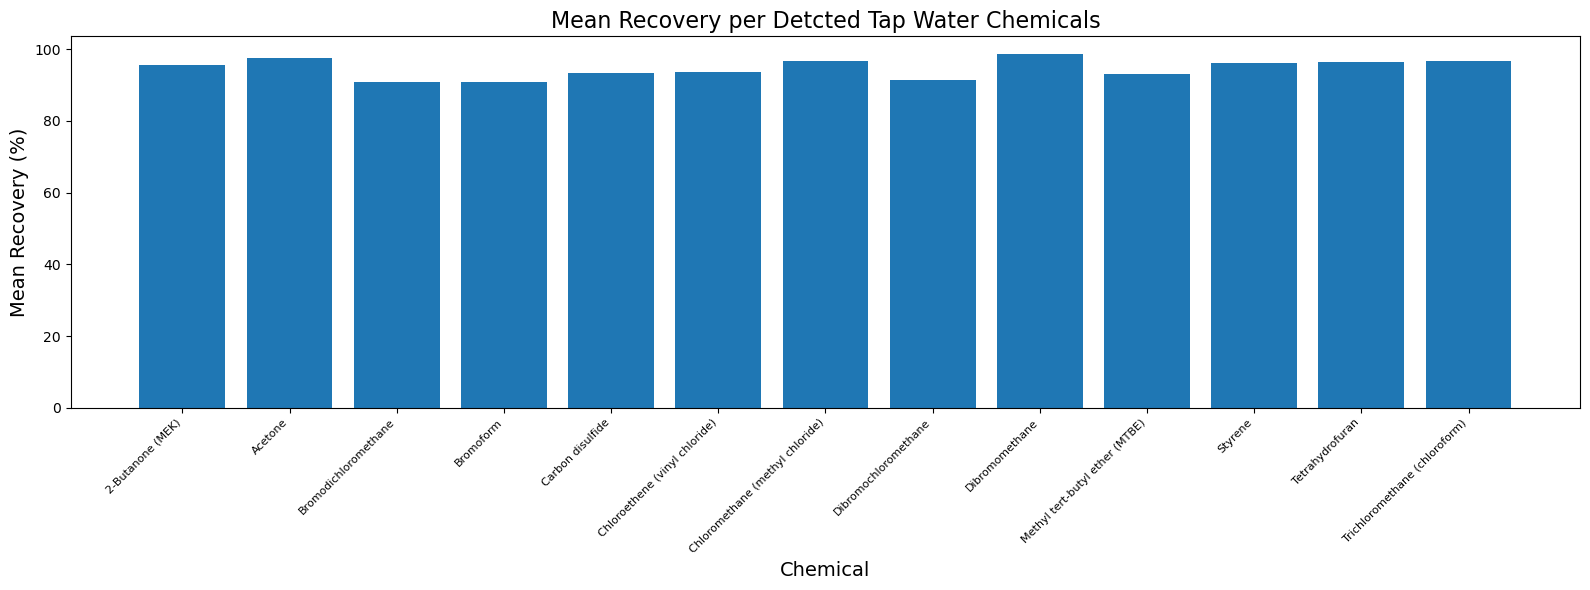

In [55]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(avg_percent_diff_df['Chemical'], avg_percent_diff_df['Mean Recovery'])

plt.title('Mean Recovery per Detcted Tap Water Chemicals', fontsize=16)
plt.xlabel('Chemical', fontsize=14)
plt.ylabel('Mean Recovery (%)', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

/var/folders/ft/rj1gvr1d3q7b_prdsnsxp8y40000gn/T/ipykernel_726/2930958654.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_percent_diff_df['Chemical'], rotation=45)


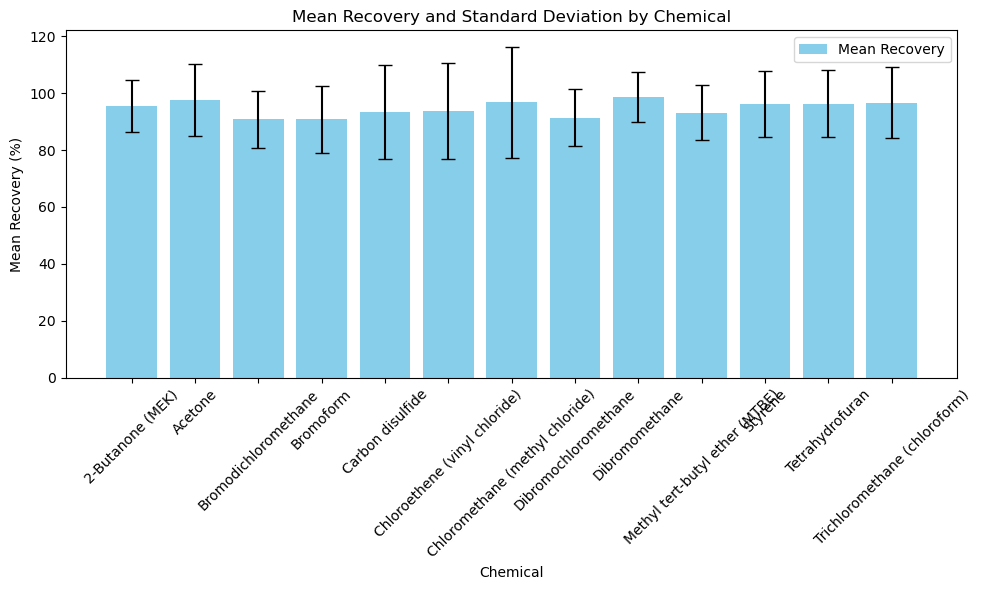

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Average Percent Difference
ax.bar(avg_percent_diff_df['Chemical'], 
       avg_percent_diff_df['Mean Recovery'], 
       yerr=avg_percent_diff_df['Standard Deviation Recovery'], 
       capsize=5, 
       color='skyblue', 
       label='Mean Recovery')

# Customize the plot
ax.set_xlabel('Chemical')
ax.set_ylabel('Mean Recovery (%)')
ax.set_title('Mean Recovery and Standard Deviation by Chemical')
ax.set_xticklabels(avg_percent_diff_df['Chemical'], rotation=45)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

                           Chemical Mean Recovery Standard Deviation Recovery  \
0                  2-Butanone (MEK)          95.6                        9.13   
1                           Acetone          97.6                        12.6   
2              Bromodichloromethane          90.8                          10   
3                         Bromoform          90.8                        11.8   
4                  Carbon disulfide          93.4                        16.6   
5     Chloroethene (vinyl chloride)          93.6                        16.9   
6   Chloromethane (methyl chloride)          96.8                        19.5   
7              Dibromochloromethane          91.3                        10.1   
8                    Dibromomethane          98.6                         8.7   
9    Methyl tert-butyl ether (MTBE)          93.1                        9.59   
10                          Styrene          96.2                        11.5   
11                  Tetrahyd

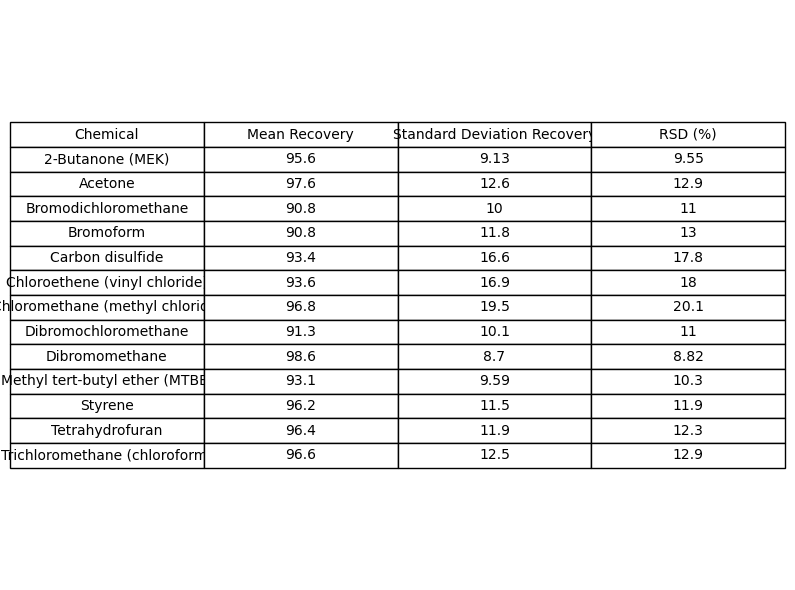

In [57]:
avg_percent_diff_df['RSD (%)'] = (avg_percent_diff_df['Standard Deviation Recovery'] / avg_percent_diff_df['Mean Recovery']) * 100
avg_percent_diff_df['Mean Recovery'] = avg_percent_diff_df['Mean Recovery'].apply(lambda x: f"{x:.3g}")
avg_percent_diff_df['Standard Deviation Recovery'] = avg_percent_diff_df['Standard Deviation Recovery'].apply(lambda x: f"{x:.3g}")
avg_percent_diff_df['RSD (%)'] = avg_percent_diff_df['RSD (%)'].apply(lambda x: f"{x:.3g}")

print(avg_percent_diff_df)
fig, ax = plt.subplots(figsize=(8, 6))

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=avg_percent_diff_df.values, 
                 colLabels=avg_percent_diff_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Display the plot
plt.tight_layout()
plt.show()